from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/강의자료/머신러닝기초/3일차_회귀

In [1]:
import sklearn
sklearn.__version__

'1.2.1'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 데이터 불러오기 : 자전거 대여량 수요 예측

In [3]:
df = pd.read_csv('./datasets/bike_train.csv')
pd.set_option('display.max_columns', len(df.columns))
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


주요 컬럼 설명
- datetime: hourly date + timestamp
- season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
- holiday: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날
- workingday: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일
- weather: 1 = 맑음, 약간 구름 낀 흐림 2 = 안개, 안개 + 흐림 3 = 가벼운 눈, 가벼운 비 + 천둥 4 = 심한 눈/비, 천둥/번개
- temp: 온도(섭씨)
- atemp: 체감온도(섭씨)
- humidity: 상대습도
- windspeed: 풍속
- casual: 사전에 등록되지 않는 사용자가 대여한 횟수
- registered: 사전에 등록된 사용자가 대여한 횟수
- count: 대여 횟수

자전거 대여 횟수(Y) 예측을 위해 X를 만들어 모델에 적용해보세요!

In [4]:
# TODO : 데이터 전처리 자유롭게

In [5]:
df.isnull().sum() #널값 없음.

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
df.info() # datetime이 오브젝트...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df=df.drop(['casual','registered'],axis=1) # 결과값이니까 삭제

In [8]:
len(df['datetime'].unique())

10886

In [9]:
df.sort_values('datetime')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [10]:
# 날짜 인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['datetime'])
df['datetime_numbering'] = encoder.transform(df['datetime'])

In [11]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,datetime_numbering
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4


In [12]:
df=df.drop('datetime',axis=1)

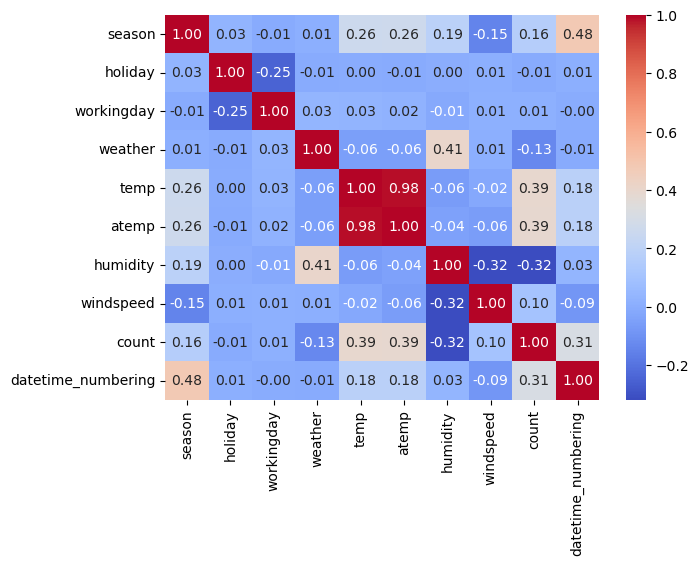

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
float_df=df.loc[:,'season':]
plt.figure(figsize = (7, 5))
sns.heatmap(float_df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

-> 온도와 체감 온도가 상관관계가 높음    

In [14]:
# 사람이 느끼는 것은 체감온도이므로 temp를 버려보자
df=df.drop('temp',axis=1) #temp가 있으면 오차 22490, temp가 없으면 오차 22472

In [15]:
# 상관관계가 낮은 컬럼을 버려보자.(둘 중 하나만)
df=df.drop('workingday',axis=1) # workingday버리면 22465 있으면 22472
# df=df.drop('holiday',axis=1) #  버리면 22475, 있으면 22472 =>필요한 데이터

In [16]:
# 생각하기에 둘이 유사해보이니까 둘 중 하나를 버리자
df=df.drop('season',axis=1) # 버리면 22427, 있으면 22465
# df=df.drop('datetime_numbering',axis=1) # 버리면 오히려 오차증가. 필요데이터

In [17]:
# df=df.drop('humidity',axis=1) # 버리면 24797 오차증가. 필요데이터
# df=df.drop('weather',axis=1) # 버리면 22438, 있으면 22427 . 필요데이터

In [18]:
df.columns

Index(['holiday', 'weather', 'atemp', 'humidity', 'windspeed', 'count',
       'datetime_numbering'],
      dtype='object')

### 모델 적용 / 평가

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산
def evaluate_regr(y,pred):
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSE: {0:.3F}, MAE: {1:.3F}'.format(rmse_val, mae_val))

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df['count']
X = df.drop(['count'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr_reg = LinearRegression()

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8708, 6)
(2178, 6)
(8708,)
(2178,)


In [22]:
lr_reg.fit(X_train, y_train)
ln_pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,ln_pred)

RMSE: 149.760, MAE: 113.086


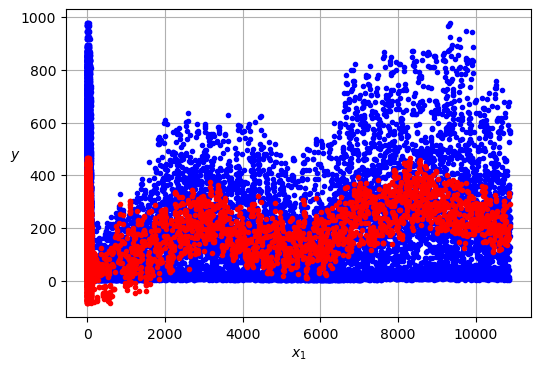

In [23]:
# 함수 시각화 ㅇㅁㅇ 비...비슷한거 아닌가
plt.figure(figsize=(6, 4))
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, ln_pred, "r.", linewidth=2, label="Predictions")  # 2차 함수 그래프
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
# plt.legend(loc="upper left")
# plt.axis([0, 10, 0, 10])
plt.grid()
plt.show()

In [24]:
# 점수가 너무 높음
# 다른 모델 적용(현재 LinearRegression -> PolynomialFeatures)

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=6, include_bias=False)

In [26]:
len(X_train.to_numpy()[0])

6

In [27]:
X_poly=poly_features.fit_transform(X_train.to_numpy())

In [28]:
len(X_poly[0]) # 923

923

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [30]:
print(lin_reg.intercept_) # y절편
print(lin_reg.coef_)# 계수

104.45241424093737
[-3.07716411e-09  1.48183882e-08 -4.47555354e-10 -1.92308300e-11
  4.25360423e-12  1.41437995e-11  1.10116075e-12  2.29448920e-13
 -5.59967523e-14  5.45010020e-13 -1.80556193e-13  4.90752796e-14
 -1.74668651e-15  6.63162084e-14 -4.77210084e-14  1.25988147e-14
  2.80279741e-14  1.24871183e-14  1.61327757e-14  6.32363138e-15
  5.83000532e-13 -1.44475154e-14  4.60442456e-16  4.60795411e-13
  3.46851603e-15  3.31322951e-13  1.61443892e-11 -2.95797900e-17
 -2.37353185e-17 -9.41242357e-17 -2.81476843e-16 -5.29135813e-17
 -1.34074882e-15 -2.93148455e-17 -1.14007745e-16 -4.52328070e-16
 -1.05733572e-16 -4.56431528e-15 -5.14218923e-16 -1.65895342e-15
  4.34079121e-16  8.66559280e-15 -7.69427572e-15  3.02356404e-16
 -1.47697419e-14  5.05820344e-16  7.59625335e-14  9.65757038e-13
  1.41649832e-16  1.66888540e-15  8.51078130e-16  8.23375667e-16
  7.40559088e-14  2.12394975e-14  2.51111158e-14  1.18284313e-14
  9.56135670e-13  5.04158782e-15  6.36676658e-15  7.22912308e-13
  5.97

In [31]:
# np.linspace(-3, 3, 90).reshape(-1, 9)

In [32]:
X_test_poly=poly_features.transform(X_test.to_numpy())
len(X_test_poly[0]) # 923

923

In [33]:
poly_pred=lin_reg.predict(X_test_poly)

In [34]:
evaluate_regr(y_test ,poly_pred)

RMSE: 151.971, MAE: 113.688


In [35]:
# 다항회귀나 선형회귀의 오차가 같게 나오는 중

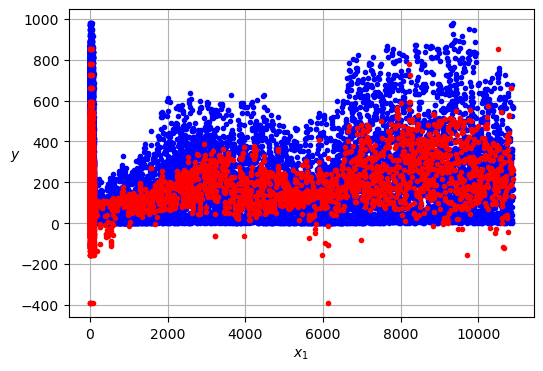

In [36]:
# 함수 시각화 ㅇㅁㅇ
plt.figure(figsize=(6, 4))
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, poly_pred, "r.", linewidth=2, label="Predictions")  # 2차 함수 그래프
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
# plt.legend(loc="upper left")
# plt.axis([0, 10, 0, 10])
plt.grid()
plt.show()

In [37]:
# 스케일링

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 3662 to 2732
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             8708 non-null   int64  
 1   weather             8708 non-null   int64  
 2   atemp               8708 non-null   float64
 3   humidity            8708 non-null   int64  
 4   windspeed           8708 non-null   float64
 5   datetime_numbering  8708 non-null   int32  
dtypes: float64(2), int32(1), int64(3)
memory usage: 442.2 KB


In [41]:
for col in X_train.columns:
    print(col,min(X_train[col])-max(X_train[col]))

holiday -1
weather -3
atemp -43.18
humidity -100
windspeed -56.9969
datetime_numbering -10884


In [42]:
X_train.columns

Index(['holiday', 'weather', 'atemp', 'humidity', 'windspeed',
       'datetime_numbering'],
      dtype='object')

In [43]:
# 간격이 너무 크니까 간격을 바꾸자
data_scaled = scaler.fit_transform(X_train[['datetime_numbering']])

In [44]:
X_train=data_scaled
X_train

array([[-0.56092234],
       [ 1.02393608],
       [ 0.51694668],
       ...,
       [ 1.40441653],
       [ 1.70765659],
       [-0.85653372]])

In [45]:
test_data_scaled = scaler.fit_transform(X_test[['datetime_numbering']])
X_test=test_data_scaled
X_test

array([[ 0.36200353],
       [ 0.78947893],
       [ 0.13084069],
       ...,
       [ 0.86685294],
       [ 0.13116042],
       [-0.28000889]])

In [46]:
new_l = LinearRegression()

new_l.fit(X_train, y_train)
scaled_pred = new_l.predict(X_test)

evaluate_regr(y_test ,scaled_pred)

RMSE: 171.883, MAE: 132.666


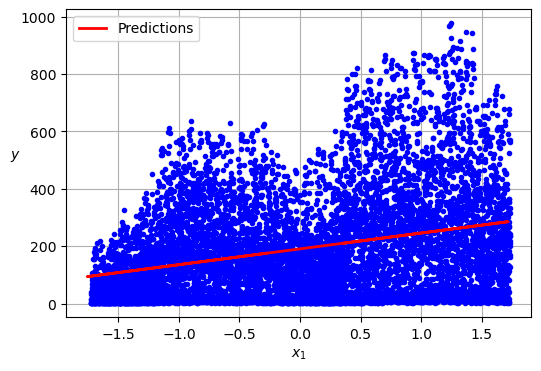

In [47]:
# 함수 시각화 ㅇㅅㅇ
plt.figure(figsize=(6, 4))
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, scaled_pred, "r-", linewidth=2, label="Predictions")  # 2차 함수 그래프
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
# plt.axis([0, 10, 0, 10])
plt.grid()
plt.show()

In [48]:
# 스케일링 하기 전의 오차가 더 작음

In [49]:
answer=pd.DataFrame(data=[np.array(y_test), ln_pred])
answer

,0,1,2,3,4,5,...,2172,2173,2174,2175,2176,2177
0,244.00000,239.00000,229.00000,467.000000,335.000000,40.000000,...,7.000000,340.000000,4.000000,627.000000,450.000000,75.000000
1,245.61324,201.96076,215.75629,342.418735,245.577757,189.553625,...,157.046358,179.455908,128.715132,410.078594,220.159186,74.429987
